### This is the Adverserial validation for the data:
### Beijin is at the first

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression

In [104]:
path='../ml_dataset/2018_kdd_cup_dataset/'
beji_aqi_2018=pd.read_csv(path+"beijing_201802_201803_aq.csv")
beji_aqi_2017_2018=pd.read_csv(path+"beijing_17_18_aq.csv")
beji_aqi_summary=pd.concat([beji_aqi_2018,beji_aqi_2017_2018],axis=0).sort_values(by=['utc_time'])


beji_aqi_summary=beji_aqi_summary.set_index([list(range(0,len(beji_aqi_summary)))])
beji_aqi_summary.sort_values(by='utc_time')

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2
0,yizhuang_aq,2017-01-01 14:00:00,278.0,362.0,117.0,5.7,6.0,2.0
20,wanshouxigong_aq,2017-01-01 14:00:00,416.0,474.0,140.0,0.6,7.0,5.0
21,wanliu_aq,2017-01-01 14:00:00,468.0,518.0,187.0,7.5,6.0,7.0
22,guanyuan_aq,2017-01-01 14:00:00,476.0,548.0,158.0,6.9,2.0,7.0
23,yongdingmennei_aq,2017-01-01 14:00:00,415.0,NaN,143.0,6.7,12.0,12.0
24,yongledian_aq,2017-01-01 14:00:00,329.0,NaN,130.0,5.5,6.0,12.0
26,qianmen_aq,2017-01-01 14:00:00,436.0,NaN,157.0,6.8,2.0,5.0
19,dongsihuan_aq,2017-01-01 14:00:00,390.0,394.0,99.0,6.8,4.0,11.0
27,nansanhuan_aq,2017-01-01 14:00:00,431.0,467.0,147.0,6.5,3.0,14.0
29,dingling_aq,2017-01-01 14:00:00,339.0,372.0,137.0,5.9,6.0,18.0


In [105]:
beijing_grid_sta=pd.read_csv(path+"Beijing_historical_meo_grid.csv")
beijing_grid_sta.sort_values(by='utc_time')

,stationName,longitude,latitude,utc_time,temperature,pressure,humidity,wind_direction,wind_speed/kph
0,beijing_grid_000,115.0,39.0,2017-01-01 00:00:00,-5.47,984.73,76.60,53.71,3.53
430,beijing_grid_430,117.0,40.0,2017-01-01 00:00:00,-5.29,1023.28,62.64,264.01,3.15
431,beijing_grid_431,117.0,40.1,2017-01-01 00:00:00,-5.27,1014.84,60.35,257.02,2.18
432,beijing_grid_432,117.0,40.2,2017-01-01 00:00:00,-5.26,1006.40,58.07,239.82,1.30
433,beijing_grid_433,117.0,40.3,2017-01-01 00:00:00,-5.12,1001.28,57.18,208.88,0.93
434,beijing_grid_434,117.0,40.4,2017-01-01 00:00:00,-4.93,997.81,56.98,176.47,0.97
435,beijing_grid_435,117.0,40.5,2017-01-01 00:00:00,-4.92,990.89,57.24,151.89,0.89
436,beijing_grid_436,117.0,40.6,2017-01-01 00:00:00,-5.31,977.04,58.41,78.07,0.49
429,beijing_grid_429,117.0,39.9,2017-01-01 00:00:00,-5.76,1024.26,71.21,276.48,3.01
437,beijing_grid_437,117.0,40.7,2017-01-01 00:00:00,-5.69,963.19,59.58,28.56,1.12


#### ADD location for the AQI station

In [106]:
beijingAqCsv_sta = pd.read_csv('Beijing_AirQuality_Stations.csv')

In [107]:
location_beijin={}
for i in range(0,len(beijingAqCsv_sta)):
    temp=beijingAqCsv_sta.iloc[i,:]
    if temp['Pollutant Species'] in list(beji_aqi_summary.groupby(["stationId"]).groups.keys()):
       location_beijin[temp['Pollutant Species']]=temp.values[1:].astype(float).tolist()[::-1]

In [108]:
def la_point(key):
    return location_beijin[key][0]

def lon_point(key):
    return location_beijin[key][1]


beji_aqi_summary['latitude']=beji_aqi_summary['stationId'].apply(lambda key: la_point(key))
beji_aqi_summary['longitude']=beji_aqi_summary['stationId'].apply(lambda key: lon_point(key))

In [109]:
beji_aqi_summary

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude
0,yizhuang_aq,2017-01-01 14:00:00,278.0,362.0,117.0,5.7,6.0,2.0,39.795,116.506
1,tongzhou_aq,2017-01-01 14:00:00,376.0,409.0,128.0,5.1,2.0,9.0,39.886,116.663
2,pingchang_aq,2017-01-01 14:00:00,495.0,588.0,152.0,7.6,5.0,5.0,40.217,116.230
3,fengtaihuayuan_aq,2017-01-01 14:00:00,391.0,496.0,134.0,6.5,6.0,5.0,39.863,116.279
4,gucheng_aq,2017-01-01 14:00:00,500.0,612.0,161.0,7.7,3.0,11.0,39.914,116.184
5,tiantan_aq,2017-01-01 14:00:00,357.0,449.0,116.0,6.2,2.0,4.0,39.886,116.407
6,yanqin_aq,2017-01-01 14:00:00,206.0,227.0,84.0,4.4,43.0,45.0,40.453,115.972
7,aotizhongxin_aq,2017-01-01 14:00:00,453.0,467.0,156.0,7.2,3.0,9.0,39.982,116.397
8,miyun_aq,2017-01-01 14:00:00,465.0,607.0,121.0,NaN,2.0,5.0,40.370,116.832
9,donggaocun_aq,2017-01-01 14:00:00,377.0,NaN,123.0,5.5,2.0,6.0,40.100,117.120


In [110]:
#left=beijing_grid_sta.drop(contaniner_1)
#right=beji_aqi_summary_copy.drop(contaniner_2)
#pd.merge(left, right, how='left', on=["utc_time"])


# Level one adverserial detection:
1.just use AQI information  
2.encode the other features NAN to 9999

### drop the all NAN column

In [111]:
beji_aqi_summary_copy=beji_aqi_summary.copy()

In [112]:
true_false_table=(beji_aqi_summary['PM2.5'].isnull()) * \
(beji_aqi_summary['PM10'].isnull()) * \
(beji_aqi_summary['NO2'].isnull()) * \
(beji_aqi_summary['CO'].isnull()) * \
(beji_aqi_summary['O3'].isnull()) * \
(beji_aqi_summary['SO2'].isnull())

/home/paslab/.local/lib/python3.5/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [113]:
beji_aqi_summary_copy=beji_aqi_summary_copy.loc[~true_false_table,:]

In [114]:
beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull(),:]

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude
1535,guanyuan_aq,2017-01-03 09:00:00,NaN,404.0,186.0,NaN,NaN,NaN,39.929,116.339
1568,guanyuan_aq,2017-01-03 10:00:00,NaN,501.0,207.0,7.1,NaN,24.0,39.929,116.339
1598,guanyuan_aq,2017-01-03 11:00:00,NaN,547.0,202.0,7.5,NaN,19.0,39.929,116.339
1637,guanyuan_aq,2017-01-03 12:00:00,NaN,594.0,201.0,7.7,NaN,17.0,39.929,116.339
1647,guanyuan_aq,2017-01-03 13:00:00,NaN,631.0,197.0,8.1,NaN,13.0,39.929,116.339
1710,guanyuan_aq,2017-01-03 14:00:00,NaN,657.0,189.0,8.2,2.0,13.0,39.929,116.339
1716,guanyuan_aq,2017-01-03 15:00:00,NaN,662.0,187.0,8.4,2.0,11.0,39.929,116.339
1778,guanyuan_aq,2017-01-03 16:00:00,NaN,813.0,186.0,0.9,2.0,11.0,39.929,116.339
1786,guanyuan_aq,2017-01-03 17:00:00,NaN,787.0,180.0,9.8,2.0,11.0,39.929,116.339
1831,guanyuan_aq,2017-01-03 18:00:00,NaN,783.0,169.0,9.7,2.0,11.0,39.929,116.339


In [115]:
beji_aqi_summary_copy["test"]=0
beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull(),"test"]=1

In [116]:
beji_aqi_summary_copy.loc[beji_aqi_summary_copy["PM2.5"].isnull()]

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude,test
1535,guanyuan_aq,2017-01-03 09:00:00,NaN,404.0,186.0,NaN,NaN,NaN,39.929,116.339,1
1568,guanyuan_aq,2017-01-03 10:00:00,NaN,501.0,207.0,7.1,NaN,24.0,39.929,116.339,1
1598,guanyuan_aq,2017-01-03 11:00:00,NaN,547.0,202.0,7.5,NaN,19.0,39.929,116.339,1
1637,guanyuan_aq,2017-01-03 12:00:00,NaN,594.0,201.0,7.7,NaN,17.0,39.929,116.339,1
1647,guanyuan_aq,2017-01-03 13:00:00,NaN,631.0,197.0,8.1,NaN,13.0,39.929,116.339,1
1710,guanyuan_aq,2017-01-03 14:00:00,NaN,657.0,189.0,8.2,2.0,13.0,39.929,116.339,1
1716,guanyuan_aq,2017-01-03 15:00:00,NaN,662.0,187.0,8.4,2.0,11.0,39.929,116.339,1
1778,guanyuan_aq,2017-01-03 16:00:00,NaN,813.0,186.0,0.9,2.0,11.0,39.929,116.339,1
1786,guanyuan_aq,2017-01-03 17:00:00,NaN,787.0,180.0,9.8,2.0,11.0,39.929,116.339,1
1831,guanyuan_aq,2017-01-03 18:00:00,NaN,783.0,169.0,9.7,2.0,11.0,39.929,116.339,1


In [117]:
import re
def year(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[0])
def month(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[1])
def date(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[2])
def hour(x):
    listofx=re.split('\-| |:',x)
    return float(listofx[3])
beji_aqi_summary_copy["year"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:year(str(x)))
beji_aqi_summary_copy["month"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:month(str(x)))
beji_aqi_summary_copy["date"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:date(str(x)))
beji_aqi_summary_copy["hour"]=beji_aqi_summary_copy["utc_time"].apply(lambda x:hour(str(x)))

In [118]:
beji_aqi_summary_copy.tail()

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude,test,year,month,date,hour
360425,liulihe_aq,2018-03-31 15:00:00,136.0,204.0,61.0,1.1,50.0,NaN,39.580,116.000,0,2018.0,3.0,31.0,15.0
360426,nongzhanguan_aq,2018-03-31 15:00:00,148.0,200.0,161.0,1.7,2.0,10.0,39.937,116.461,0,2018.0,3.0,31.0,15.0
360427,yizhuang_aq,2018-03-31 15:00:00,137.0,192.0,166.0,1.6,5.0,9.0,39.795,116.506,0,2018.0,3.0,31.0,15.0
360428,tongzhou_aq,2018-03-31 15:00:00,197.0,355.0,139.0,1.3,19.0,18.0,39.886,116.663,0,2018.0,3.0,31.0,15.0
360429,guanyuan_aq,2018-03-31 15:00:00,139.0,191.0,151.0,2.1,2.0,8.0,39.929,116.339,0,2018.0,3.0,31.0,15.0


In [119]:
beji_aqi_summary_copy.columns

Index(['stationId', 'utc_time', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2',
       'latitude', 'longitude', 'test', 'year', 'month', 'date', 'hour'],
      dtype='object')

In [167]:
#col=list(beji_aqi_summary_copy.columns).remove('PM2.5')

In [168]:
beji_aqi_summary_copy=beji_aqi_summary_copy.fillna(9999).copy()

In [169]:
train_cv=beji_aqi_summary_copy.loc[beji_aqi_summary_copy['test']==0,:].copy()
test_cv=beji_aqi_summary_copy.loc[beji_aqi_summary_copy['test']==1,:].copy()

In [170]:
len(beji_aqi_summary_copy)

341795

In [171]:
train_cv=train_cv.drop(["PM2.5"],axis=1)
test_cv=test_cv.drop(["PM2.5"],axis=1)

In [172]:
train_cv.columns

Index(['stationId', 'utc_time', 'PM10', 'NO2', 'CO', 'O3', 'SO2', 'latitude',
       'longitude', 'test', 'year', 'month', 'date', 'hour'],
      dtype='object')

In [173]:
col=['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2', 'latitude',
       'longitude']

In [174]:
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [175]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)

clf=LogisticRegression()

for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [     0      1      3 ... 341792 341793 341794] TEST: [     2      7     16 ... 341750 341756 341770]
# AUC: 62.32%

# log_loss: 0.07262401903491571

# fold 2
TRAIN: [     1      2      3 ... 341792 341793 341794] TEST: [     0      6     17 ... 341713 341722 341771]
# AUC: 65.66%

# log_loss: 0.07198214782564609

# fold 3
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    11     12     33 ... 341772 341784 341785]
# AUC: 66.36%

# log_loss: 0.07170971218349632

# fold 4
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [     4     10     31 ... 341764 341790 341791]
# AUC: 65.81%

# log_loss: 0.07180227036302071

# fold 5
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    38     39     46 ... 341745 341746 341769]
# AUC: 67.49%

# log_loss: 0.07139001282290887

# fold 6
TRAIN: [     0      2      3 ... 341792 341793 341794] TEST: [     1      8      9 ... 341753 341768 341781]
# AUC: 64.24%

# log_loss: 0.07208713379759485

# fo

The importance of the feature:(more important means it let the data's distribution more non-uniform)

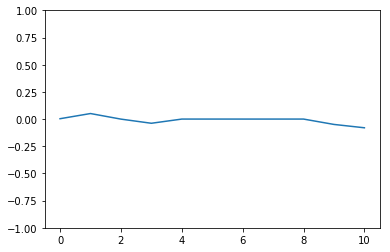

In [176]:
plt.clf()
plt.plot(clf.coef_.tolist()[0])
plt.ylim((-1,1))
plt.show()

In [177]:
clf.coef_.tolist()[0]

[0.0033923131141826574,
 0.050974129247011994,
 -0.00033555621527181967,
 -0.038492277955959886,
 5.758043984904923e-05,
 9.294092579446751e-05,
 6.334741114652572e-05,
 6.815299575917284e-05,
 8.917429716897549e-05,
 -0.049249485647623326,
 -0.08002929096363785]

In [182]:
X_train.columns

Index(['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2',
       'latitude', 'longitude'],
      dtype='object')

Seems 1, 3, 9,10(start from 0) thats is month , hour ,latitude, longitude, effect most

#### change to random forest for stronger classification, more strict validation

In [183]:
from sklearn.ensemble import RandomForestClassifier as RF
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [184]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [     0      1      3 ... 341792 341793 341794] TEST: [     2      7     16 ... 341750 341756 341770]
# AUC: 93.70%

# log_loss: 0.05999968518363067

# fold 2
TRAIN: [     1      2      3 ... 341792 341793 341794] TEST: [     0      6     17 ... 341713 341722 341771]
# AUC: 92.78%

# log_loss: 0.0676170318936461

# fold 3
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    11     12     33 ... 341772 341784 341785]
# AUC: 94.50%

# log_loss: 0.053288501050232945

# fold 4
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [     4     10     31 ... 341764 341790 341791]
# AUC: 93.83%

# log_loss: 0.05827165796237883

# fold 5
TRAIN: [     0      1      2 ... 341792 341793 341794] TEST: [    38     39     46 ... 341745 341746 341769]
# AUC: 93.38%

# log_loss: 0.06108713790654841

# fold 6
TRAIN: [     0      2      3 ... 341792 341793 341794] TEST: [     1      8      9 ... 341753 341768 341781]
# AUC: 93.83%

# log_loss: 0.0587130152740289

# fol

OOps!! it's  not good.....

<Figure size 432x288 with 0 Axes>

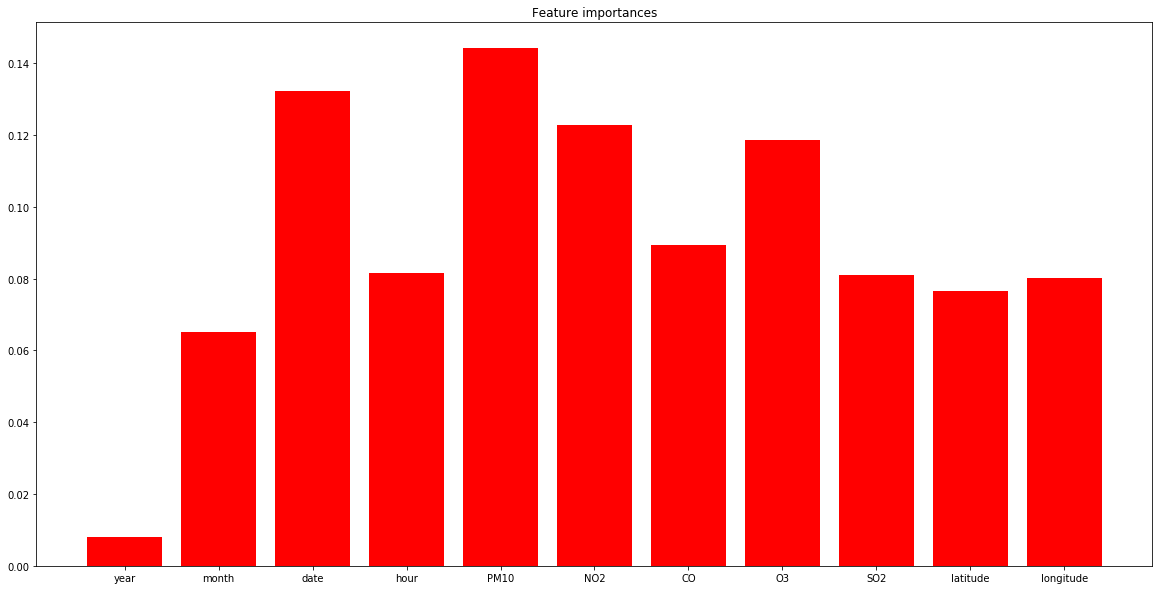

In [185]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.xticks(range(X_train.shape[1]), X_train.columns.values)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

#### drop out the latitude and longitude

In [214]:
col=['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2']

In [215]:
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [216]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)

clf=LogisticRegression()

for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [   0    1    2 ... 8277 8278 8279] TEST: [  19   23   33   37   41   56   61   65   69   79   80   87   95  101
  118  132  149  157  169  177  181  185  217  222  230  233  239  251
  257  263  308  315  318  319  328  332  334  349  353  381  393  408
  429  445  453  457  465  468  472  476  483  487  496  503  509  518
  533  538  540  543  544  554  576  586  601  625  641  647  676  682
  683  696  706  710  712  730  736  737  742  743  748  763  789  794
  800  811  828  856  858  866  879  927  932  940  965  970  994  996
  997 1002 1005 1009 1010 1017 1018 1022 1025 1027 1042 1046 1053 1055
 1056 1057 1074 1075 1078 1084 1087 1103 1127 1144 1163 1172 1176 1180
 1183 1193 1199 1221 1261 1263 1287 1297 1302 1315 1320 1323 1335 1339
 1345 1374 1383 1400 1406 1414 1421 1426 1429 1452 1454 1465 1479 1480
 1483 1487 1501 1509 1511 1533 1550 1559 1561 1566 1575 1593 1608 1615
 1616 1618 1632 1643 1650 1656 1669 1670 1703 1728 1730 1731 1732 1740
 1746 1755 1758 176

/home/paslab/.local/lib/python3.5/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


# AUC: 80.07%

# log_loss: 0.13719786473319684

# fold 5
TRAIN: [   0    1    2 ... 8277 8278 8279] TEST: [  39   49   62   68   70   82   83   85   86   92   99  103  104  111
  112  120  134  136  139  150  152  166  174  175  180  191  192  195
  205  211  212  214  218  220  238  270  274  278  283  288  289  300
  304  305  309  312  314  326  330  348  360  366  368  383  389  402
  411  449  450  451  461  463  480  489  493  495  498  508  516  517
  528  551  566  567  568  594  596  602  617  621  633  637  644  648
  650  658  668  679  680  684  690  700  708  720  725  741  744  745
  757  758  759  777  801  802  816  820  831  841  843  859  868  871
  873  887  890  945  949  993  999 1001 1006 1029 1030 1064 1068 1099
 1104 1105 1111 1126 1135 1151 1152 1157 1164 1187 1189 1200 1211 1216
 1233 1271 1289 1292 1293 1334 1337 1349 1361 1391 1392 1415 1424 1427
 1432 1434 1437 1456 1472 1473 1476 1491 1503 1506 1526 1532 1534 1538
 1551 1583 1598 1626 1642 1647 1658 1659 1

# AUC: 71.49%

# log_loss: 0.12157361547617142

# fold 10
TRAIN: [   0    1    2 ... 8277 8278 8279] TEST: [   4   16   34   64   98  114  116  119  127  130  143  146  154  160
  161  189  190  197  200  202  206  225  241  253  262  301  335  337
  379  391  395  412  417  466  474  488  492  502  512  524  537  559
  562  563  569  574  580  595  600  606  608  616  623  635  646  659
  663  675  698  699  709  717  728  732  740  753  766  769  775  784
  804  815  825  830  851  853  854  860  863  870  876  878  895  953
  954  956  959  971  975  980  991  995 1012 1015 1016 1021 1028 1045
 1059 1060 1062 1066 1069 1076 1081 1082 1122 1139 1147 1148 1150 1154
 1156 1166 1167 1184 1191 1218 1243 1267 1275 1282 1291 1300 1306 1348
 1363 1365 1369 1409 1445 1470 1478 1484 1495 1500 1516 1527 1528 1529
 1542 1568 1570 1571 1585 1597 1625 1631 1635 1636 1648 1663 1664 1678
 1679 1682 1685 1686 1687 1693 1696 1707 1715 1722 1733 1734 1757 1794
 1802 1806 1816 1819 1841 1843 1853 1895 

In [217]:
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [218]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
TRAIN: [   0    1    2 ... 8277 8278 8279] TEST: [  19   23   33   37   41   56   61   65   69   79   80   87   95  101
  118  132  149  157  169  177  181  185  217  222  230  233  239  251
  257  263  308  315  318  319  328  332  334  349  353  381  393  408
  429  445  453  457  465  468  472  476  483  487  496  503  509  518
  533  538  540  543  544  554  576  586  601  625  641  647  676  682
  683  696  706  710  712  730  736  737  742  743  748  763  789  794
  800  811  828  856  858  866  879  927  932  940  965  970  994  996
  997 1002 1005 1009 1010 1017 1018 1022 1025 1027 1042 1046 1053 1055
 1056 1057 1074 1075 1078 1084 1087 1103 1127 1144 1163 1172 1176 1180
 1183 1193 1199 1221 1261 1263 1287 1297 1302 1315 1320 1323 1335 1339
 1345 1374 1383 1400 1406 1414 1421 1426 1429 1452 1454 1465 1479 1480
 1483 1487 1501 1509 1511 1533 1550 1559 1561 1566 1575 1593 1608 1615
 1616 1618 1632 1643 1650 1656 1669 1670 1703 1728 1730 1731 1732 1740
 1746 1755 1758 176

# AUC: 86.06%

# log_loss: 0.15706107415077622

# fold 3
TRAIN: [   1    2    3 ... 8277 8278 8279] TEST: [   0    8   14   15   29   44   45   51   59   63   75  102  107  110
  121  122  124  135  144  170  184  188  196  210  216  221  227  231
  240  252  254  259  265  267  279  290  291  297  303  322  325  333
  339  347  371  376  380  387  410  415  420  421  422  426  430  432
  434  438  439  443  452  462  479  501  505  506  527  553  558  565
  577  598  599  604  622  626  640  652  655  662  665  672  691  705
  746  751  755  783  787  799  805  807  808  809  810  812  834  838
  864  880  889  904  907  911  921  926  931  958  964  969  977 1032
 1039 1049 1073 1079 1090 1092 1101 1108 1109 1113 1115 1119 1158 1161
 1170 1173 1192 1195 1201 1210 1212 1219 1220 1223 1225 1226 1235 1298
 1310 1317 1340 1354 1357 1360 1362 1371 1372 1379 1393 1397 1410 1416
 1419 1423 1433 1436 1443 1444 1446 1450 1451 1464 1467 1477 1482 1488
 1498 1499 1512 1513 1514 1536 1539 1541 1

# AUC: 87.97%

# log_loss: 0.12113680937070623

# fold 5
TRAIN: [   0    1    2 ... 8277 8278 8279] TEST: [  39   49   62   68   70   82   83   85   86   92   99  103  104  111
  112  120  134  136  139  150  152  166  174  175  180  191  192  195
  205  211  212  214  218  220  238  270  274  278  283  288  289  300
  304  305  309  312  314  326  330  348  360  366  368  383  389  402
  411  449  450  451  461  463  480  489  493  495  498  508  516  517
  528  551  566  567  568  594  596  602  617  621  633  637  644  648
  650  658  668  679  680  684  690  700  708  720  725  741  744  745
  757  758  759  777  801  802  816  820  831  841  843  859  868  871
  873  887  890  945  949  993  999 1001 1006 1029 1030 1064 1068 1099
 1104 1105 1111 1126 1135 1151 1152 1157 1164 1187 1189 1200 1211 1216
 1233 1271 1289 1292 1293 1334 1337 1349 1361 1391 1392 1415 1424 1427
 1432 1434 1437 1456 1472 1473 1476 1491 1503 1506 1526 1532 1534 1538
 1551 1583 1598 1626 1642 1647 1658 1659 1

# AUC: 88.91%

# log_loss: 0.14705315307768996

# fold 7
TRAIN: [   0    1    2 ... 8277 8278 8279] TEST: [   7   11   20   22   35   42   72   78   97  140  147  162  163  204
  226  237  243  261  282  313  340  343  359  361  363  365  369  370
  372  377  392  398  399  405  406  407  424  440  444  448  456  460
  464  475  482  484  521  522  541  542  546  560  572  581  593  597
  610  630  631  632  649  651  685  689  697  702  703  707  714  735
  767  772  780  781  788  819  821  836  840  845  850  855  867  874
  875  882  900  905  916  961  962  986 1000 1004 1011 1013 1019 1026
 1031 1037 1048 1067 1072 1080 1091 1100 1124 1125 1132 1133 1171 1177
 1179 1190 1206 1232 1241 1246 1249 1283 1284 1286 1326 1327 1343 1347
 1367 1368 1376 1382 1403 1404 1408 1422 1428 1431 1440 1442 1449 1459
 1462 1475 1486 1494 1508 1517 1523 1537 1546 1549 1577 1584 1601 1613
 1624 1637 1638 1641 1651 1653 1660 1667 1674 1681 1689 1692 1725 1727
 1735 1749 1764 1766 1778 1798 1814 1826 1

# AUC: 81.64%

# log_loss: 0.20156051004093997

# fold 9
TRAIN: [   0    1    2 ... 8276 8277 8278] TEST: [   3    5    9   54   55   66   77   94  117  125  126  133  137  164
  201  223  224  232  235  242  249  255  260  280  285  302  320  327
  341  345  357  362  364  375  384  385  388  404  419  455  467  470
  477  499  504  510  513  523  525  536  539  603  638  645  666  667
  671  673  688  713  716  722  723  760  768  770  774  793  797  814
  822  823  827  832  846  872  894  899  901  914  918  919  922  924
  928  943  946  950  951  966  984  989  992 1063 1065 1077 1118 1120
 1141 1145 1155 1160 1169 1202 1205 1214 1217 1248 1250 1252 1254 1256
 1276 1296 1308 1311 1312 1314 1318 1324 1329 1331 1332 1342 1353 1358
 1384 1388 1396 1460 1481 1493 1531 1540 1555 1573 1574 1581 1603 1604
 1605 1619 1633 1639 1645 1646 1668 1673 1680 1719 1724 1753 1759 1761
 1792 1810 1823 1824 1827 1828 1834 1838 1848 1852 1854 1856 1857 1863
 1865 1887 1901 1906 1908 1917 1920 1944 1

# AUC: 84.50%

# log_loss: 0.18840444843446666



<Figure size 432x288 with 0 Axes>

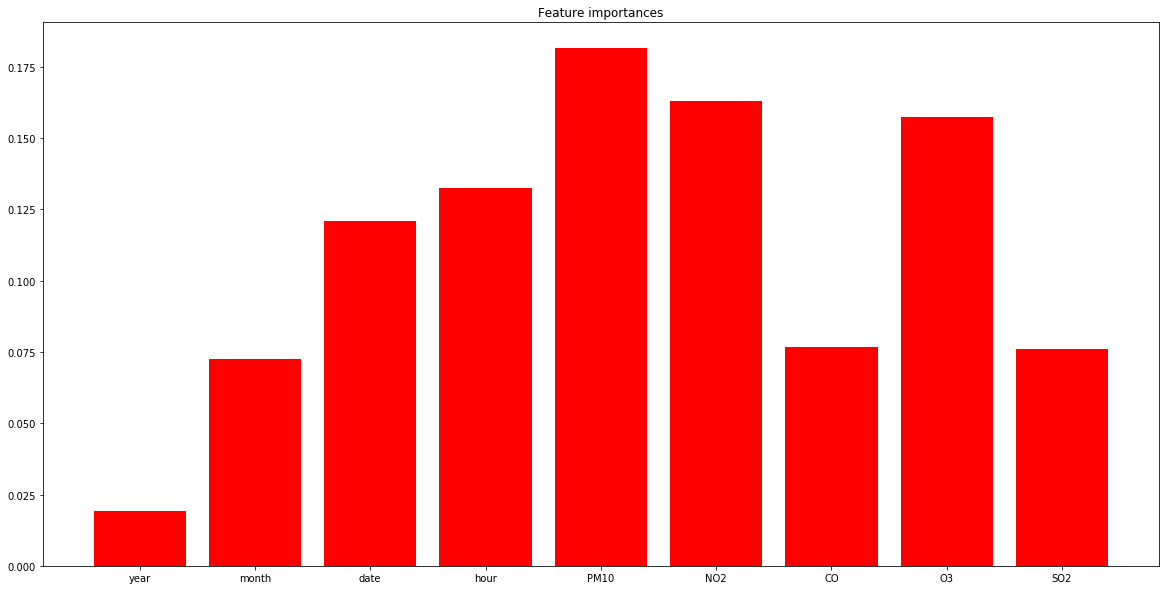

In [219]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.xticks(range(X_train.shape[1]), col)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

 It's not good for the NAN impute prediction, the different distribution has been detected by the algorithm

Specify to high freqeuncy NAN AQI station: At dongsihuan

In [220]:
beji_aqi_summary_copy.reset_index( inplace = True, drop = True )
temp_data=beji_aqi_summary_copy.iloc[beji_aqi_summary_copy.groupby(['stationId']).groups['dongsihuan_aq']]


In [221]:
temp_data.reset_index( inplace = True, drop = True )

In [222]:
temp_data

,stationId,utc_time,PM2.5,PM10,NO2,CO,O3,SO2,latitude,longitude,test,year,month,date,hour
0,dongsihuan_aq,2017-01-01 14:00:00,390.0,394.0,99.0,6.8,4.0,11.0,39.939,116.483,0,2017.0,1.0,1.0,14.0
1,dongsihuan_aq,2017-01-01 15:00:00,390.0,9999.0,92.0,6.6,4.0,8.0,39.939,116.483,0,2017.0,1.0,1.0,15.0
2,dongsihuan_aq,2017-01-01 16:00:00,374.0,396.0,81.0,7.2,5.0,10.0,39.939,116.483,0,2017.0,1.0,1.0,16.0
3,dongsihuan_aq,2017-01-01 17:00:00,401.0,419.0,71.0,7.3,4.0,13.0,39.939,116.483,0,2017.0,1.0,1.0,17.0
4,dongsihuan_aq,2017-01-01 18:00:00,408.0,419.0,58.0,6.9,3.0,8.0,39.939,116.483,0,2017.0,1.0,1.0,18.0
5,dongsihuan_aq,2017-01-01 19:00:00,413.0,418.0,75.0,0.8,4.0,6.0,39.939,116.483,0,2017.0,1.0,1.0,19.0
6,dongsihuan_aq,2017-01-01 20:00:00,408.0,9999.0,71.0,0.7,9999.0,7.0,39.939,116.483,0,2017.0,1.0,1.0,20.0
7,dongsihuan_aq,2017-01-01 21:00:00,363.0,9999.0,91.0,6.1,5.0,10.0,39.939,116.483,0,2017.0,1.0,1.0,21.0
8,dongsihuan_aq,2017-01-01 22:00:00,198.0,9999.0,99.0,4.1,4.0,4.0,39.939,116.483,0,2017.0,1.0,1.0,22.0
9,dongsihuan_aq,2017-01-01 23:00:00,108.0,9999.0,88.0,2.5,4.0,3.0,39.939,116.483,0,2017.0,1.0,1.0,23.0


In [223]:
temp_data['test'].value_counts()

0    8071
1     209
Name: test, dtype: int64

In [224]:
train_cv=temp_data.loc[temp_data['test']==0,:].copy()
test_cv=temp_data.loc[temp_data['test']==1,:].copy()

X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [225]:
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [226]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print(auc)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
0.7408356907119282
# AUC: 74.08%

# log_loss: 0.28621592943584767

# fold 2
0.8605652917920577
# AUC: 86.06%

# log_loss: 0.15706107415077622

# fold 3
0.8733109104856317
# AUC: 87.33%

# log_loss: 0.12111729320795388

# fold 4
0.8797427273263704
# AUC: 87.97%

# log_loss: 0.12113680937070623

# fold 5
0.9351802678940224
# AUC: 93.52%

# log_loss: 0.10391207289777998

# fold 6
0.8890659113707441
# AUC: 88.91%

# log_loss: 0.14705315307768996

# fold 7
0.8939045258747861
# AUC: 89.39%

# log_loss: 0.11519719882713661

# fold 8
0.8164276863161621
# AUC: 81.64%

# log_loss: 0.20156051004093997

# fold 9
0.873487932967487
# AUC: 87.35%

# log_loss: 0.15516623809441224

# fold 10
0.8450433705080546
# AUC: 84.50%

# log_loss: 0.18840444843446666



<Figure size 432x288 with 0 Axes>

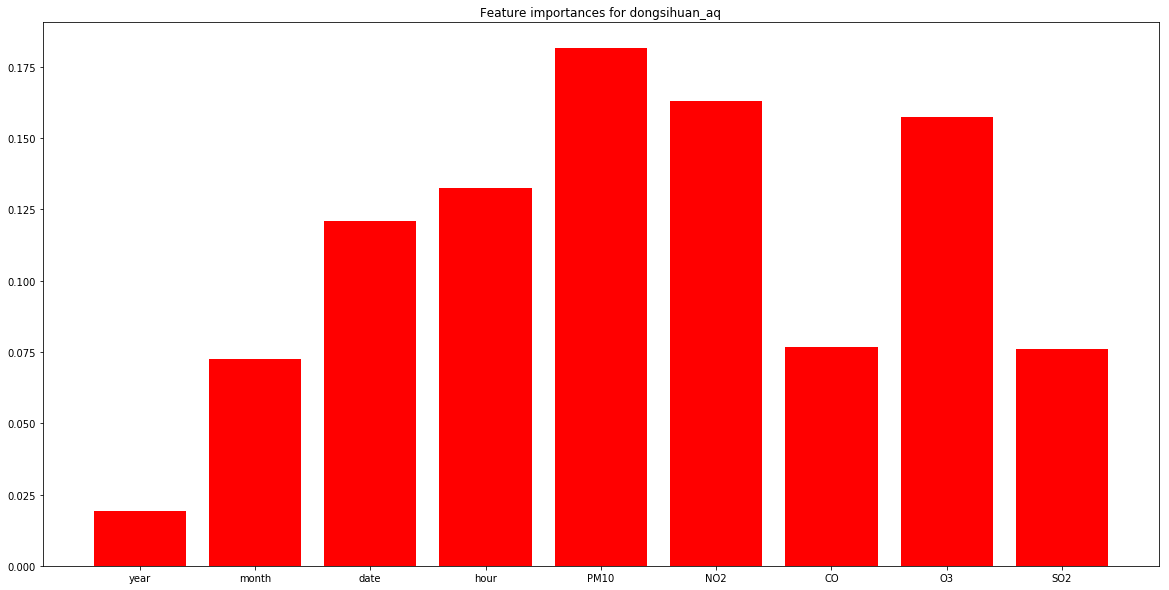

In [228]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances for dongsihuan_aq")
plt.xticks(range(X_train.shape[1]), col)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

Still high, then we did it by training batch on each station

#### If we use no time features !? what will happend

In [229]:
col=['PM10', 'NO2', 'CO', 'O3', 'SO2']
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [230]:
clf = RF( n_estimators =100,n_jobs=-1,random_state=42)

In [231]:
predictions = np.zeros( y.shape )
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn import cross_validation as CV
cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)


for f, ( train_index, test_index ) in enumerate( cv ):
    
    print ("# fold {}".format( f + 1))
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train_adcv = x.iloc[train_index]
    x_test_adcv = x.iloc[test_index]
    y_train_adcv = y.iloc[train_index]
    y_test_adcv = y.iloc[test_index]
    
    clf.fit( x_train_adcv.values, y_train_adcv.values )
    
    p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
    auc = roc_auc_score( y_test_adcv, p )
    logloss=log_loss(y_test_adcv,p)
    print(auc)
    print ("# AUC: {:.2%}\n".format( auc )	)
    print ("# log_loss: {}\n".format( logloss )	)
    
    predictions[ test_index ] = p


# fold 1
0.6480139085337107
# AUC: 64.80%

# log_loss: 0.3426628423094844

# fold 2
0.8126512067032514
# AUC: 81.27%

# log_loss: 0.20653568373213288

# fold 3
0.718091697645601
# AUC: 71.81%

# log_loss: 0.2866960834853927

# fold 4
0.7813772349088335
# AUC: 78.14%

# log_loss: 0.21446280470853843

# fold 5
0.8569953384079778
# AUC: 85.70%

# log_loss: 0.12264263720196733

# fold 6
0.7842686021124683
# AUC: 78.43%

# log_loss: 0.23717781904455942

# fold 7
0.8490293267244939
# AUC: 84.90%

# log_loss: 0.15919759595340574

# fold 8
0.7506933380539328
# AUC: 75.07%

# log_loss: 0.28359018508298645

# fold 9
0.829881394937157
# AUC: 82.99%

# log_loss: 0.16380326951004265

# fold 10
0.7924101610904586
# AUC: 79.24%

# log_loss: 0.2045800742591532



Thus we can see the time is the cause that make the distribution different, that is the missing value is not uniform distributed by time

<Figure size 432x288 with 0 Axes>

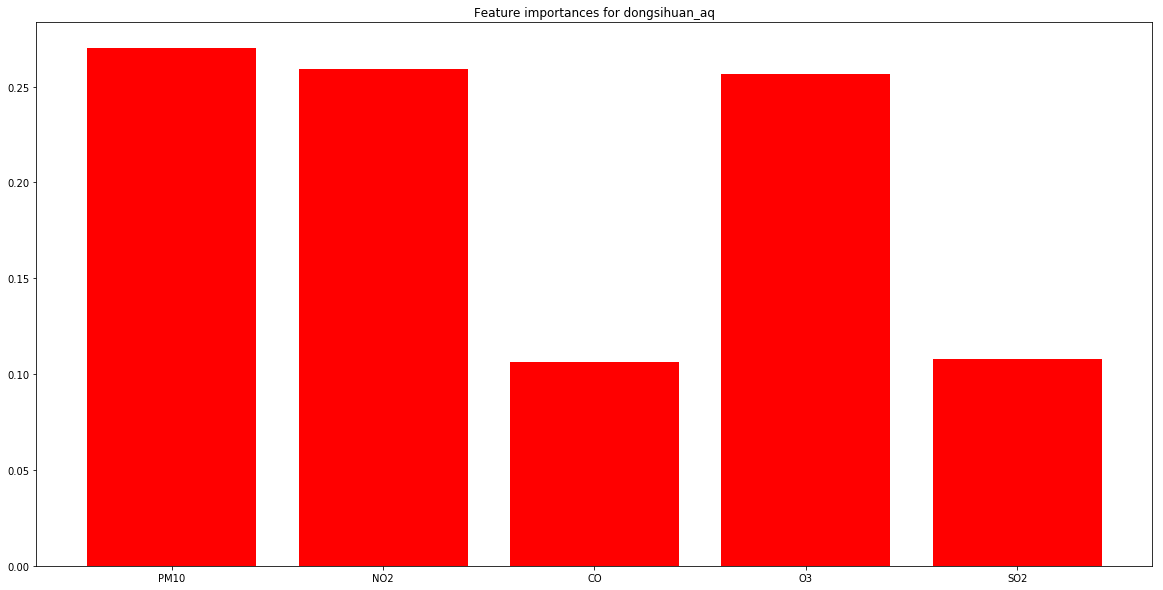

In [232]:
plt.clf()
plt.figure(figsize=(20,10))
plt.title("Feature importances for dongsihuan_aq")
plt.xticks(range(X_train.shape[1]), col)
plt.bar(range(X_train.shape[1]), clf.feature_importances_,
       color="r", align="center")
#plt.plot(clf.feature_importances_)
plt.show()

In [233]:
col

['PM10', 'NO2', 'CO', 'O3', 'SO2']

But PM1.0's distribution is not uniform

#### with time

In [204]:
col=['year', 'month', 'date', 'hour', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [153]:
import gc
#del temp_data
gc.collect()
for key in beji_aqi_summary.groupby(['stationId']).groups:
    clf = RF( n_estimators =100,n_jobs=-1,random_state=42)
    print(key)
    temp_data=beji_aqi_summary_copy.iloc[beji_aqi_summary_copy.groupby(['stationId']).groups[key]]
    print(temp_data['test'].value_counts())
    train_cv=temp_data.loc[temp_data['test']==0,:].copy()
    test_cv=temp_data.loc[temp_data['test']==1,:].copy()
    X_train=train_cv[col]
    X_test=test_cv[col]
    y=pd.concat([train_cv.test,test_cv.test])
    data_cv = pd.concat([X_train, X_test])
    data_cv.reset_index( inplace = True, drop = True )
    y.reset_index( inplace = True, drop = True )
    x=data_cv
    cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)
    accumulator_logloss=[]
    accumulator_AUC=[]
    predictions = np.zeros( y.shape )
    for f, ( train_index, test_index ) in enumerate( cv ):
    
        #print ("# fold {}".format( f + 1))
    #print("TRAIN:", train_index, "TEST:", test_index)
        x_train_adcv = x.iloc[train_index]
        x_test_adcv = x.iloc[test_index]
        y_train_adcv = y.iloc[train_index]
        y_test_adcv = y.iloc[test_index]
    
        clf.fit( x_train_adcv.values, y_train_adcv.values )
    
        p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
        auc = roc_auc_score( y_test_adcv, p )
        logloss=log_loss(y_test_adcv,p)
        accumulator_AUC.append( auc )
        accumulator_logloss.append(logloss)
        print ("# AUC: {:.2%}\n".format( auc )	)
        print ("# log_loss: {}\n".format( logloss )	)
        predictions[ test_index ] = p
        
    print ("** mean AUC: {:.2%}\n".format(np.mean(accumulator_AUC,axis=0)))
    print ("** mean log_loss: {}\n".format(np.mean(accumulator_logloss,axis=0)))
    print ("========================================")
    del accumulator_AUC, accumulator_logloss
    del temp_data
    
    


beibuxinqu_aq
0    9745
1      91
Name: test, dtype: int64
# AUC: 91.39%

# log_loss: 0.0603271618355962

# AUC: 91.42%

# log_loss: 0.05263592332201199

# AUC: 99.36%

# log_loss: 0.017158314593272585

# AUC: 84.75%

# log_loss: 0.08922901841310302

# AUC: 92.94%

# log_loss: 0.04881992067642888

# AUC: 85.19%

# log_loss: 0.08610514732957214

# AUC: 78.92%

# log_loss: 0.12225733222486378

# AUC: 73.07%

# log_loss: 0.1554496264076108

# AUC: 97.78%

# log_loss: 0.022563485567874922

# AUC: 86.63%

# log_loss: 0.08489172507583229

** mean AUC: 88.15%

** mean log_loss: 0.07394376554461665

aotizhongxin_aq
0    10093
1      111
Name: test, dtype: int64
# AUC: 88.73%

# log_loss: 0.0911644914377208

# AUC: 93.45%

# log_loss: 0.05391014520294414

# AUC: 91.85%

# log_loss: 0.05755295804298377

# AUC: 99.71%

# log_loss: 0.01858448729001794

# AUC: 99.98%

# log_loss: 0.013074720622866983

# AUC: 88.48%

# log_loss: 0.08473660801618814

# AUC: 99.91%

# log_loss: 0.014876700444568914

#

# AUC: 99.42%

# log_loss: 0.041727565320548624

# AUC: 97.77%

# log_loss: 0.061733328818569765

# AUC: 98.24%

# log_loss: 0.05398621322256616

# AUC: 98.28%

# log_loss: 0.052529209447172466

# AUC: 99.68%

# log_loss: 0.03510636907156499

# AUC: 99.14%

# log_loss: 0.043617119651687825

# AUC: 96.70%

# log_loss: 0.0840357627163202

# AUC: 98.03%

# log_loss: 0.04543859565277259

# AUC: 98.33%

# log_loss: 0.04179582741277459

# AUC: 94.75%

# log_loss: 0.10385142402187521

** mean AUC: 98.03%

** mean log_loss: 0.05638214153358525

wanliu_aq
0    10117
1       90
Name: test, dtype: int64
# AUC: 93.26%

# log_loss: 0.048335814726216446

# AUC: 86.81%

# log_loss: 0.07741552498749354

# AUC: 91.62%

# log_loss: 0.05184453743554895

# AUC: 84.82%

# log_loss: 0.08306988920952697

# AUC: 91.36%

# log_loss: 0.05598060657194339

# AUC: 99.68%

# log_loss: 0.015829584156494516

# AUC: 86.13%

# log_loss: 0.08155118339960338

# AUC: 91.96%

# log_loss: 0.05404451132025384

# AUC: 98.03%


# AUC: 93.49%

# log_loss: 0.06070587800603498

# AUC: 93.32%

# log_loss: 0.05579611927008149

# AUC: 92.53%

# log_loss: 0.06219583403708552

# AUC: 93.26%

# log_loss: 0.05577192754444492

# AUC: 91.00%

# log_loss: 0.06229405563229671

# AUC: 82.46%

# log_loss: 0.1255265801025476

# AUC: 99.57%

# log_loss: 0.020842195330078212

# AUC: 96.88%

# log_loss: 0.028902161338820086

# AUC: 86.89%

# log_loss: 0.0954198587602722

# AUC: 97.64%

# log_loss: 0.02703986250016223

** mean AUC: 92.70%

** mean log_loss: 0.059449447252182396

miyun_aq
0    10034
1       90
Name: test, dtype: int64
# AUC: 91.64%

# log_loss: 0.05200120998572619

# AUC: 80.23%

# log_loss: 0.1129974849562098

# AUC: 97.71%

# log_loss: 0.024357894476099668

# AUC: 99.21%

# log_loss: 0.020525644660759228

# AUC: 93.53%

# log_loss: 0.04593081556613079

# AUC: 85.98%

# log_loss: 0.08340374281431988

# AUC: 86.11%

# log_loss: 0.08537433154424164

# AUC: 85.66%

# log_loss: 0.08836313737083074

# AUC: 92.77%

# l

The result is really bad, it can be easily detected, it's hard for the missing value imputation which implement by the surpervised learning model.

#### without time

In [205]:
col=['PM10', 'NO2', 'CO', 'O3', 'SO2']
X_train=train_cv[col]
X_test=test_cv[col]
y=pd.concat([train_cv.test,test_cv.test])
data_cv = pd.concat([X_train, X_test])
data_cv.reset_index( inplace = True, drop = True )
y.reset_index( inplace = True, drop = True )
x=data_cv

In [206]:
import gc
#del temp_data
gc.collect()
for key in beji_aqi_summary.groupby(['stationId']).groups:
    clf = RF( n_estimators =100,n_jobs=-1,random_state=42)
    print(key)
    temp_data=beji_aqi_summary_copy.iloc[beji_aqi_summary_copy.groupby(['stationId']).groups[key]]
    print(temp_data['test'].value_counts())
    train_cv=temp_data.loc[temp_data['test']==0,:].copy()
    test_cv=temp_data.loc[temp_data['test']==1,:].copy()
    X_train=train_cv[col]
    X_test=test_cv[col]
    y=pd.concat([train_cv.test,test_cv.test])
    data_cv = pd.concat([X_train, X_test])
    data_cv.reset_index( inplace = True, drop = True )
    y.reset_index( inplace = True, drop = True )
    x=data_cv
    cv = CV.StratifiedKFold( y, n_folds = 10, shuffle = True, random_state = 42)
    accumulator_logloss=[]
    accumulator_AUC=[]
    predictions = np.zeros( y.shape )
    for f, ( train_index, test_index ) in enumerate( cv ):
    
        #print ("# fold {}".format( f + 1))
    #print("TRAIN:", train_index, "TEST:", test_index)
        x_train_adcv = x.iloc[train_index]
        x_test_adcv = x.iloc[test_index]
        y_train_adcv = y.iloc[train_index]
        y_test_adcv = y.iloc[test_index]
    
        clf.fit( x_train_adcv.values, y_train_adcv.values )
    
        p = clf.predict_proba( x_test_adcv.values  )[:,1] # the probability of "1" class
    
        auc = roc_auc_score( y_test_adcv, p )
        logloss=log_loss(y_test_adcv,p)
        accumulator_AUC.append( auc )
        accumulator_logloss.append(logloss)
        print ("# AUC: {:.2%}\n".format( auc )	)
        print ("# log_loss: {}\n".format( logloss )	)
        predictions[ test_index ] = p
        
    print ("** mean AUC: {:.2%}\n".format(np.mean(accumulator_AUC,axis=0)))
    print ("** mean log_loss: {}\n".format(np.mean(accumulator_logloss,axis=0)))
    print ("========================================")
    del accumulator_AUC, accumulator_logloss
    del temp_data
    

beibuxinqu_aq
0    9745
1      91
Name: test, dtype: int64
# AUC: 80.57%

# log_loss: 0.12372880393833047

# AUC: 80.64%

# log_loss: 0.11527134579903853

# AUC: 86.52%

# log_loss: 0.08541261086954308

# AUC: 67.72%

# log_loss: 0.1855354522603813

# AUC: 91.62%

# log_loss: 0.055267120738023624

# AUC: 84.55%

# log_loss: 0.08756379531238472

# AUC: 67.23%

# log_loss: 0.18587716073941518

# AUC: 60.89%

# log_loss: 0.22059477022954807

# AUC: 86.33%

# log_loss: 0.0860220018362606

# AUC: 79.38%

# log_loss: 0.12073628272438357

** mean AUC: 78.55%

** mean log_loss: 0.12660093444473092

aotizhongxin_aq
0    10093
1      111
Name: test, dtype: int64
# AUC: 60.66%

# log_loss: 0.2812378055944679

# AUC: 91.38%

# log_loss: 0.06574216893888889

# AUC: 82.28%

# log_loss: 0.12373844495940639

# AUC: 91.42%

# log_loss: 0.06758726459699935

# AUC: 88.95%

# log_loss: 0.08329137145425226

# AUC: 83.15%

# log_loss: 0.1215426557953874

# AUC: 92.37%

# log_loss: 0.061415706545336735

# AU

# AUC: 80.56%

# log_loss: 0.2943867572147287

# AUC: 75.54%

# log_loss: 0.3521854384993421

# AUC: 81.74%

# log_loss: 0.2893531193089695

# AUC: 78.20%

# log_loss: 0.33453402198887283

# AUC: 88.63%

# log_loss: 0.18518537801066629

# AUC: 81.56%

# log_loss: 0.32358355491351676

# AUC: 88.67%

# log_loss: 0.1497947527728621

# AUC: 80.45%

# log_loss: 0.32795681242716707

# AUC: 89.81%

# log_loss: 0.10571761474591096

# AUC: 84.27%

# log_loss: 0.24446713003820794

** mean AUC: 82.94%

** mean log_loss: 0.2607164579920244

wanliu_aq
0    10117
1       90
Name: test, dtype: int64
# AUC: 91.32%

# log_loss: 0.06048020215548024

# AUC: 71.33%

# log_loss: 0.15666488341470364

# AUC: 80.31%

# log_loss: 0.09607740404201716

# AUC: 78.76%

# log_loss: 0.11997607893118817

# AUC: 79.00%

# log_loss: 0.12403260154831625

# AUC: 90.95%

# log_loss: 0.059172597906189534

# AUC: 85.66%

# log_loss: 0.08665835532147464

# AUC: 83.25%

# log_loss: 0.09450190188567287

# AUC: 84.90%

# log_lo

# AUC: 82.20%

# log_loss: 0.13235976387360013

# AUC: 83.30%

# log_loss: 0.13155535129153373

# AUC: 85.38%

# log_loss: 0.10266813838250739

# AUC: 81.85%

# log_loss: 0.1293200227114837

# AUC: 77.15%

# log_loss: 0.14134869561642066

# AUC: 75.99%

# log_loss: 0.16171694030661293

# AUC: 80.93%

# log_loss: 0.13361909805087113

# AUC: 80.37%

# log_loss: 0.13123984463844607

# AUC: 69.88%

# log_loss: 0.199710814494696

# AUC: 89.40%

# log_loss: 0.07216626792264455

** mean AUC: 80.64%

** mean log_loss: 0.1335704937288816

miyun_aq
0    10034
1       90
Name: test, dtype: int64
# AUC: 84.68%

# log_loss: 0.08672701899640696

# AUC: 79.02%

# log_loss: 0.12028013687837438

# AUC: 84.28%

# log_loss: 0.09090579044343362

# AUC: 90.29%

# log_loss: 0.06141764662074771

# AUC: 93.34%

# log_loss: 0.04689297383588679

# AUC: 84.82%

# log_loss: 0.09070377481407485

# AUC: 79.93%

# log_loss: 0.12285023575766113

# AUC: 65.88%

# log_loss: 0.18712787510951365

# AUC: 86.38%

# log_los

That is to say not all AQI station has the uniform distribution of the missing value. But some have!!

# Level two adverserial detection

### Preprocessing
#### binding by time slice, time slice( time stamp) align

In [ ]:
start=time.time()
a = set(beijing_grid_sta.groupby(["utc_time"]).groups.keys())
b = set(beji_aqi_summary.groupby(["utc_time"]).groups.keys())
exclusive=(a ^ b)
beijing_grid_sta_copy=beijing_grid_sta.copy() #a
beji_aqi_summary_copy=beji_aqi_summary.copy() #b
first_time_1=1
first_time_2=1
for timeslice in exclusive:
    if timeslice in a:
        if first_time_1 is 1:
            first_time_1=0
            contaniner_1=np.array(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])
        else:
            new=np.array(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])
            contaniner_1=np.append(contaniner_1,new)
    else:
        if first_time_2 is 1:
            first_time_2=0
            contaniner_2=np.array(beji_aqi_summary.groupby(["utc_time"]).groups[timeslice])
        else:
            new=np.array(beji_aqi_summary.groupby(["utc_time"]).groups[timeslice])
            contaniner_2=np.append(contaniner_2,new)

contaniner_1=np.sort(contaniner_1) 
contaniner_2=np.sort(contaniner_2) 
end=time.time()
print("cost time:"+ str(end-start))

In [ ]:
import pickle
pickle.dump(contaniner_1,open("Beijin_grid_station(drop index).pkl", "wb"))
pickle.dump(contaniner_2,open("Beijin_AQI_station(drop index).pkl", "wb"))

In [ ]:
beijing_grid_sta.drop(contaniner_1)

In [31]:
beijing_grid_sta=beijing_grid_sta.drop(contaniner_1)

In [ ]:
beji_aqi_summary_copy=beji_aqi_summary_copy.drop(contaniner_2)

In [40]:
beijing_grid_sta.columns

Index(['stationName', 'longitude', 'latitude', 'utc_time', 'temperature',
       'pressure', 'humidity', 'wind_direction', 'wind_speed/kph'],
      dtype='object')

In [65]:
col=['utc_time', 'temperature',
       'pressure', 'humidity', 'wind_direction', 'wind_speed/kph']
gp=beijing_grid_sta[col].groupby(by=["utc_time"])

In [66]:
gp.mean()

,temperature,pressure,humidity,wind_direction,wind_speed/kph
utc_time,,,,,
2017-01-01 14:00:00,-2.937343,973.012381,59.271767,297.573026,8.135100
2017-01-01 15:00:00,-3.073978,973.186359,59.480630,301.197896,9.037988
2017-01-01 16:00:00,-3.284685,973.287127,58.416559,306.058095,9.265806
2017-01-01 17:00:00,-3.495207,973.387112,57.352427,309.745791,9.601167
2017-01-01 18:00:00,-3.705868,973.487665,56.288249,310.809401,10.033011
2017-01-01 19:00:00,-4.030215,973.682243,55.899601,306.101106,9.610200
2017-01-01 20:00:00,-4.354424,973.876897,55.510922,297.747158,9.295392
2017-01-01 21:00:00,-4.678618,974.071229,55.122396,288.609032,9.101813
2017-01-01 22:00:00,-4.859908,974.435515,54.690661,279.580276,8.522227


In [57]:
beijing_grid_sta.merge(gp, on=["utc_time"], how='left')

ValueError: can not merge DataFrame with instance of type <class 'pandas.core.groupby.DataFrameGroupBy'>

In [13]:
beijing_grid_sta.groupby(["utc_time"]).groups[timeslice]

Int64Index([5123370, 5123371, 5123372, 5123373, 5123374, 5123375, 5123376,
            5123377, 5123378, 5123379,
            ...
            5124011, 5124012, 5124013, 5124014, 5124015, 5124016, 5124017,
            5124018, 5124019, 5124020],
           dtype='int64', length=651)

In [14]:
type(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])

pandas.core.indexes.numeric.Int64Index

In [15]:
np.array(beijing_grid_sta.groupby(["utc_time"]).groups[timeslice])

array([5123370, 5123371, 5123372, 5123373, 5123374, 5123375, 5123376,
       5123377, 5123378, 5123379, 5123380, 5123381, 5123382, 5123383,
       5123384, 5123385, 5123386, 5123387, 5123388, 5123389, 5123390,
       5123391, 5123392, 5123393, 5123394, 5123395, 5123396, 5123397,
       5123398, 5123399, 5123400, 5123401, 5123402, 5123403, 5123404,
       5123405, 5123406, 5123407, 5123408, 5123409, 5123410, 5123411,
       5123412, 5123413, 5123414, 5123415, 5123416, 5123417, 5123418,
       5123419, 5123420, 5123421, 5123422, 5123423, 5123424, 5123425,
       5123426, 5123427, 5123428, 5123429, 5123430, 5123431, 5123432,
       5123433, 5123434, 5123435, 5123436, 5123437, 5123438, 5123439,
       5123440, 5123441, 5123442, 5123443, 5123444, 5123445, 5123446,
       5123447, 5123448, 5123449, 5123450, 5123451, 5123452, 5123453,
       5123454, 5123455, 5123456, 5123457, 5123458, 5123459, 5123460,
       5123461, 5123462, 5123463, 5123464, 5123465, 5123466, 5123467,
       5123468, 5123

In [16]:
timeslice

'2017-11-24 22:00:00'

In [17]:
'2017-11-24 20:00:00'

'2017-11-24 20:00:00'

In [18]:
np.append([1, 2, 3], [4, 5, 6])

array([1, 2, 3, 4, 5, 6])

In [24]:
from sklearn.linear_model import LogisticRegression